In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency

In [8]:
df = pd.read_csv(r'C:\Users\Samsung\Downloads\healthcare_dataset.csv.zip')
print(df.head())

            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0    18856.281306    

Teste t de Student para Comparar Médias de Idade entre Homens e Mulheres:

- Realizado para determinar se há uma diferença significativa nas médias de idade entre homens e mulheres.

In [9]:

print("\nTeste t de Student para comparar médias de idade entre homens e mulheres:")
male_age = df[df['Gender'] == 'Male']['Age']
female_age = df[df['Gender'] == 'Female']['Age']
t_stat, p_value = ttest_ind(male_age, female_age)
# t_stat:Um número que nos diz quão diferentes são as idades médias de homens e mulheres.
# p_value: A probabilidade de que a diferença observada nas idades médias entre homens e mulheres seja apenas uma coincidência.

print(f"T-Stat: {t_stat}, P-Value: {p_value}")

# t_stat : O valor é próximo de zero, indicando que as médias são bastante semelhantes.
# p_value: Este valor nos diz que há uma alta probabilidade (64%) de que a pequena diferença observada entre as idades médias seja apenas por acaso

# Não há diferença estatisticamente significativa nas médias de idade entre homens e mulheres.


Teste t de Student para comparar médias de idade entre homens e mulheres:
T-Stat: -0.4716034119757328, P-Value: 0.6372117448238176


Teste qui-quadrado para verificar a associação entre a seguradora de saúde e o valor cobrado:
- Permite uma análise estatística objetiva para entender melhor a relação entre essas duas variáveis e suas possíveis implicações.

In [10]:

print("\nTeste qui-quadrado para verificar a associação entre a seguradora de saúde e o valor cobrado:")
contingency_table_insurance_billing = pd.crosstab(df['Insurance Provider'], df['Billing Amount'])
chi2_insurance_billing, p_insurance_billing, _, _ = chi2_contingency(contingency_table_insurance_billing)
# chi2_insurance_billing : mede a diferença entre as frequências observadas e esperadas. 
# p_insurance_billing : É a probabilidade de ver uma associação tão forte quanto a que observamos entre a seguradora de saúde e o valor cobrado
print(f"Chi-Squared: {chi2_insurance_billing}, P-Value: {p_insurance_billing}")

# Chi-Squared: indica que as diferenças entre as frequências observadas e esperadas são muito grandes
# P-Value : Significa que é extremamente improvável que a associação observada seja devido ao acaso

# Os resultados indicam que há uma forte associação estatística entre a seguradora de saúde e o valor cobrado.
# enfatizando a importância dessa variável na determinação dos custos e na escolha do plano de saúde.


Teste qui-quadrado para verificar a associação entre a seguradora de saúde e o valor cobrado:
Chi-Squared: 222000.00000000006, P-Value: 1.0640435959686028e-247


Gráfico 1: Proporção dos tipos de admissão

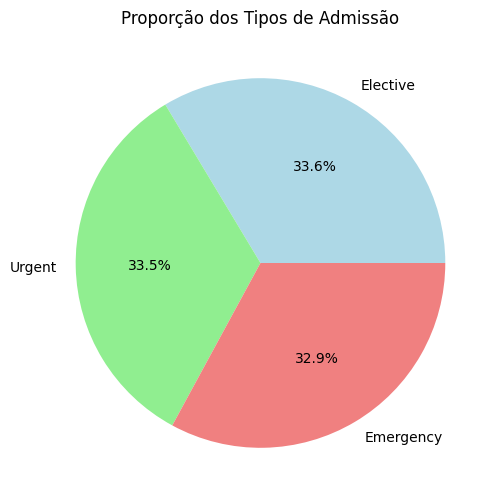

In [11]:
plt.figure(figsize=(8, 6))
df['Admission Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Proporção dos Tipos de Admissão')
plt.ylabel('')
plt.show()

Gráfico 2: Distribuição dos tipos de remédios por doença e gênero

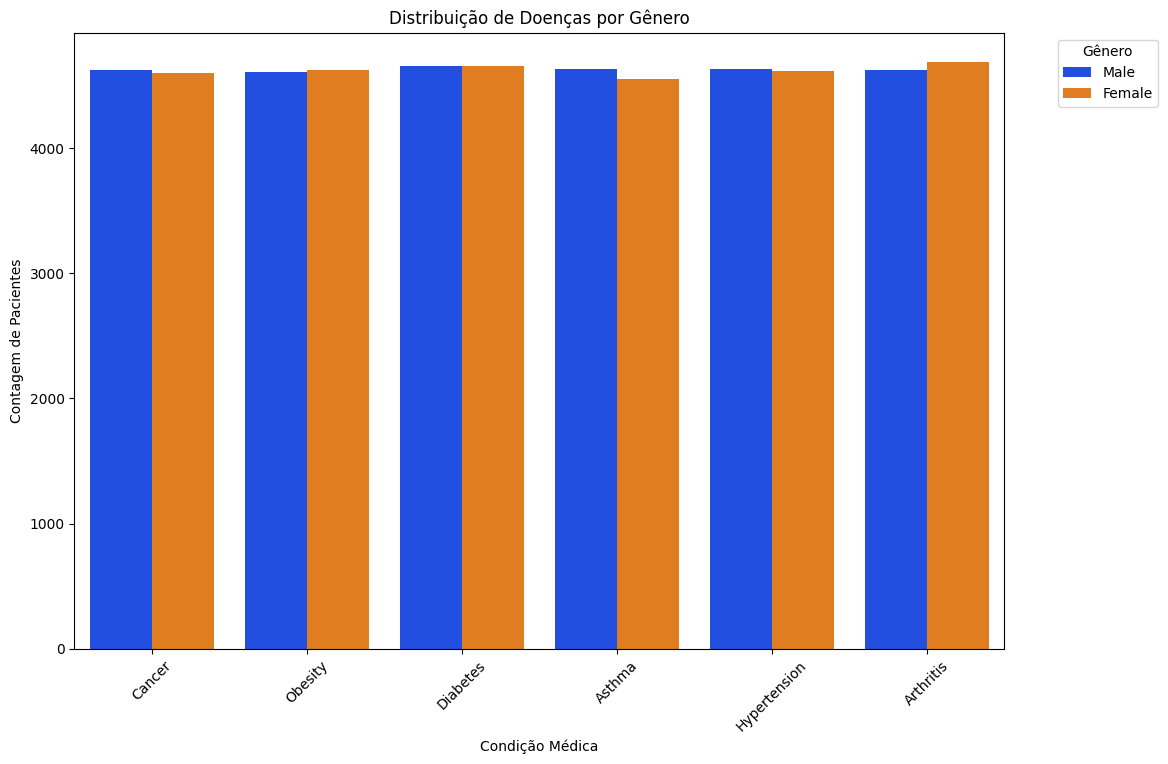

In [12]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Medical Condition', hue='Gender', palette='bright')
plt.title('Distribuição de Doenças por Gênero')
plt.xlabel('Condição Médica')
plt.ylabel('Contagem de Pacientes')
plt.legend(title='Gênero', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()